# ** Investigating a TMDd-5000-Movie-Dataset**

### Dain Russell, 2020

### Udacity Data Analyst Nanodegree Project 2


## **Table of Contents**

* [Introduction](#introduction)
* [Data Wrangling](#data wrangling)
    * [General Properties](#general properties)
    * [Dataset Observations](#dataset observations)
    * [Data Cleaning](#data cleaning)
* [Exploratory Data Analysis](#exploratory data analysis)   
    * [What is the vote average for movies?](#research question 1)
    * [Research Question 2](#research question 2)
    * [Research Question 3](#research question 3)
    * [Research Question 4](#research question 3)
* [Conclusion](#conclusion)
* [Citations](#citations)





## **Introduction** <a class="anchor" id="introduction"></a>
> In this project, we analyzed a dataset and then communicated the findings about it. We used the Python libraries NumPy, pandas, and Matplotlib to make your analysis easier.

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> I will explore the following questions:
1. What is most profitable movie?
2. Is the movie rating influenced by how large the budget is?
3. Comparing the mean runtime across different genre (Action versus Adventure eg.)
4. What is the relationship between movie rating and the type of movie? (We will look at the correlation between "popularity" and "genre")








#### Let's get started!
We set up the import statements for all of the packages we plan to use.



In [1]:
# import statements for all of the packages 
import pandas as pd  
import numpy as np  
import csv 
import seaborn as sns
import matplotlib.pyplot as plt

# 'magic word' so that your visualizations are plotted
%matplotlib inline




## **Data Wrangling**<a class="anchor" id="data wrangling"></a>
In this section of the report, the data is loaded, checked for  cleanliness, and then trimmed and cleaned for analysis. 







### **General Properties**<a class="anchor" id="general properties"></a>


Here we load and read the data into the pandas dataframe we are calling `df`.

**Now let's preview the first 5 and last 5 rows of our data.**

In [2]:
# Load and Read the CSV File Using Pandas read_csv function
df = pd.read_csv('tmdb-movies.csv', sep=',')

#printing first five rows with defined columns of tmdb-movies database
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Observation:** We have a dataset containing movie information that includes, budget, revenue, runtime and name of a different genres of movies. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. 

**Generating the shape of our original dataframe in terms of Rows and Columns.**

In [3]:
# dataframe.shape 
# Get the number of rows and columns
print(("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1])))


There are 10866 rows and 21 columns in the dataset.


**Let's check for duplicate rows**

In [4]:
# checking for the total number of duplicate rows 
df.duplicated().sum()


1

**Observation:** From the output above we see there is only 1 duplicate row. Now let's figure out where it is.

In [5]:
# finding the duplicate row in the dataset.
#keep='first' considers all of the same values as duplicates
df[df.duplicated(keep=False)]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


**Let's get a summary of the dataset that includes index and column dtypes, non-null values and memory usage**

In [6]:
#raw datset summary that displays missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Observation:** We can see from the above summary that there are null values in the dataset. It shows those exact numbers of null values in imdb_id, cast, homepage, director, tagline, keywords,overview, genres, and producion_companies. 


**Below we are using a heatmap to visualize the missing (null) values occurence.**

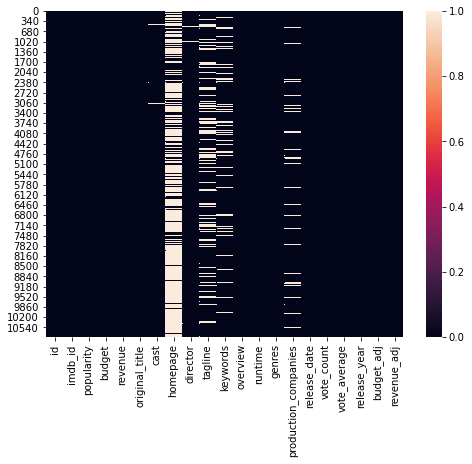

imdb_id's null rate :0.09%
cast's null rate :0.7%
homepage's null rate :72.98%
director's null rate :0.4%
tagline's null rate :25.99%
keywords's null rate :13.74%
overview's null rate :0.04%
genres's null rate :0.21%
production_companies's null rate :9.48%


In [7]:
#plot a heatmap to visualize the location of missing values
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))


**Observation:** 'homepage' has a 73% null rate clearly seen on the map. 'imdb_id', 'cast', 'director','overview' and 'genre' have very few missing values.

**Descriptive Summary Statistics on Raw Data.**

In [8]:
##### this function will generate decriptive statistics summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Observation:** From `df.info()` I knew the different data types so knew what columns would would numerical value in this statistical summary.

The movies have a mean popularity of 0.6 with at least 50% having a popularity value of 0.4. The max popularity is 33 and the minimum value is 0. The movies have a mean budget is 3.091321e+07. Both the minimum values for budget and revenue are 0.

**We see from the data right above that budget, revenue and runtime have zero minimum values, and must decide if we going to drop these zeros or not.**
* First we count the number of zero values in each column

In [9]:
#counting zero values in each column.
df_budget_count =  df.groupby('budget').count()['id']
df_budget_count.head(2)


budget
0    5696
1       4
Name: id, dtype: int64

In [10]:
#counting zero values in each column.
df_revenue_count =  df.groupby('revenue').count()['id']
df_revenue_count.head(2)


revenue
0    6016
2       2
Name: id, dtype: int64

In [11]:
#counting zero values in each column.
df_runtime_count =  df.groupby('runtime').count()['id']
df_runtime_count.head(2)


runtime
0    31
2     5
Name: id, dtype: int64

**Observation:** There are a lot of zero values specifically in budget and revenue. It is best we decide to keep the zero values.

### **Data Cleaning**<a class="anchor" id="data cleaning"></a>
Let's clean up the data in order to make it easier to handle since we are only focusing on just a few columns.

1. Drop Columns
2. Drop the duplicate values
3. Keeping zero values and replacing with NaN values
4. Filling zero value with mean

Formatting release_date from  string format to datetime format





**Dropping Columns that are not needed and set inplace=True so we keep the changes**

* Since we are not going to need all these columns for our analysis, we will be dropping some of the columns. That is good so we have less columns to clean.

In [12]:
# this function will drop columns using the list of column names
df.drop(['homepage','overview','keywords', 'imdb_id', 'production_companies','cast', 'director', 'tagline','budget_adj','revenue_adj'], axis=1, inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

**Dataset after dropping unwanted columns.**

In [13]:
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


**Dropping duplicates and confirm there are none**

In [14]:
# drop duplicates 
df.drop_duplicates(inplace=True)

# print number of duplicates 
df.duplicated().sum()

0

**So recall I decided to keep the zero values instead of dropping them since there were so many in budget and revenue.
We will instead, replace the zero values in each of the 3 columns  with NaN.**

In [15]:
#replace zero values with null values in all 3 columns to NaN.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['runtime'] =df['runtime'].replace(0, np.NAN)

# see if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          5169 non-null   float64
 3   revenue         4849 non-null   float64
 4   original_title  10865 non-null  object 
 5   runtime         10834 non-null  float64
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1018.6+ KB


**Observation:** All zero values confirmed to be replaced with null values

**Let's try replacing the zero values with the mean as well**

In [16]:
#fill the null values with them mean
df.fillna(df.mean(), inplace=True);
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  float64
 3   revenue         10865 non-null  float64
 4   original_title  10865 non-null  object 
 5   runtime         10865 non-null  float64
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1018.6+ KB


In [17]:
#this function will generate decriptive statistics summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,2.683275e+07,1.082720e+08,30.904039,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,1.925000e+07,4.109806e+07,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,3.073958e+07,8.923886e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,3.073958e+07,8.923886e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


**Observation:** All minimum zero values confirmed to be replaced with null the mean

**Fill the null values with the means.** 


In [18]:
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


**Cleaned Dataset Summary**

Descriptive Statistics Summary after filling null values with the mean

In [19]:
#this function will generate decriptive statistics summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,2.683275e+07,1.082720e+08,30.904039,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,1.925000e+07,4.109806e+07,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,3.073958e+07,8.923886e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,3.073958e+07,8.923886e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


**One last thing- let's change the data type for release_date to datetime format**

In [20]:
# convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# confirm changes
df.dtypes
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

# **Exploratory Data Analysis**<a class="anchor" id="exploratory data analysis"></a>
Tip: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

Using a histogram to visualize what the data looks like for each column

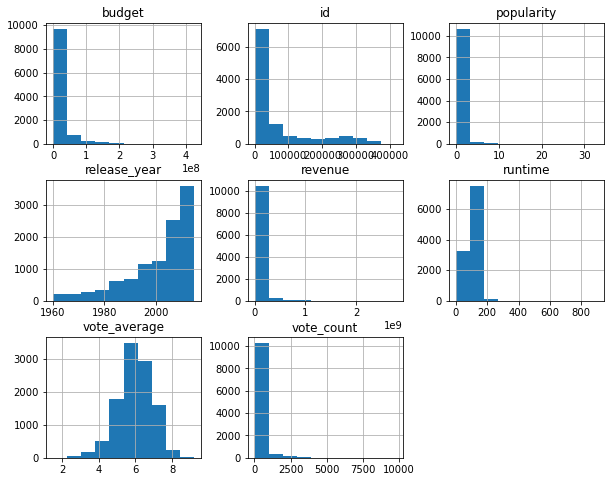

In [21]:
#calling the pandas `hist`() method returns histograms for all columns in the series.
df.hist(figsize=(10,8));

### What is the profit for each genre?<a class="anchor" id="research question 1"></a>

**Adding a column 'profit' record the difference between the revenue and the budget**

In [22]:
# adding column
df['profit'] = df['revenue']-df['budget']

df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.316249e+09


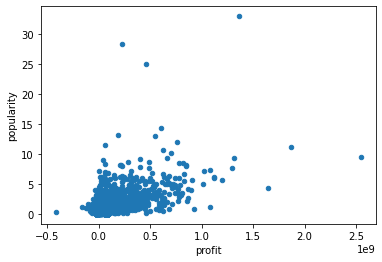

In [23]:
# Correlation between profit and runtime
df.plot(x='profit', y='popularity', kind='scatter');

### What are the number of movies released each year?<a class="anchor" id="research question 2"></a>

In [28]:
#grouping number of movies by year
movie_released= df.groupby('release_year').count()['id']

movie_released.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

Text(0, 0.5, 'Number of Movies')

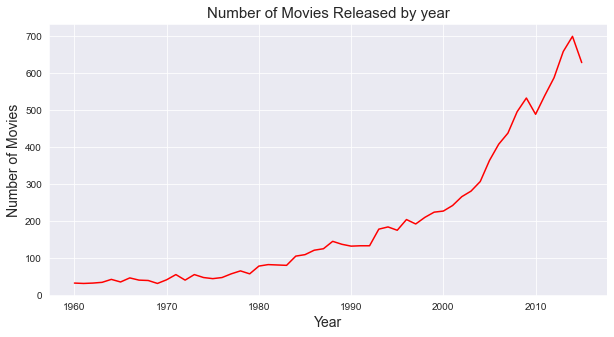

In [29]:
# visualization

#set the sheet style
sns.set_style('darkgrid')
x = movie_released.index
y = movie_released
plt.figure(figsize=(10,5))
plt.plot(x, y, color='red')
plt.title('Number of Movies Released by year', fontsize = 15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)


We see that there are between 30 to 100 movies released each year between 1960 and 1980. By year 2000, we are up to 200 movies per year then a sharp increase to 700 movies 15 years later.

### What is the average runtime of movies?<a class="anchor" id="research question 1"></a>

In [30]:
#defining a function to find the mean of a column
def avg(column):
    return df['runtime'].mean()

#calling that function to print mean
avg('runtime')

102.36385453202878

In [31]:
#desriptive statistics for runtime column
df['runtime'].describe()

count    10865.000000
mean       102.363855
std         30.904039
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

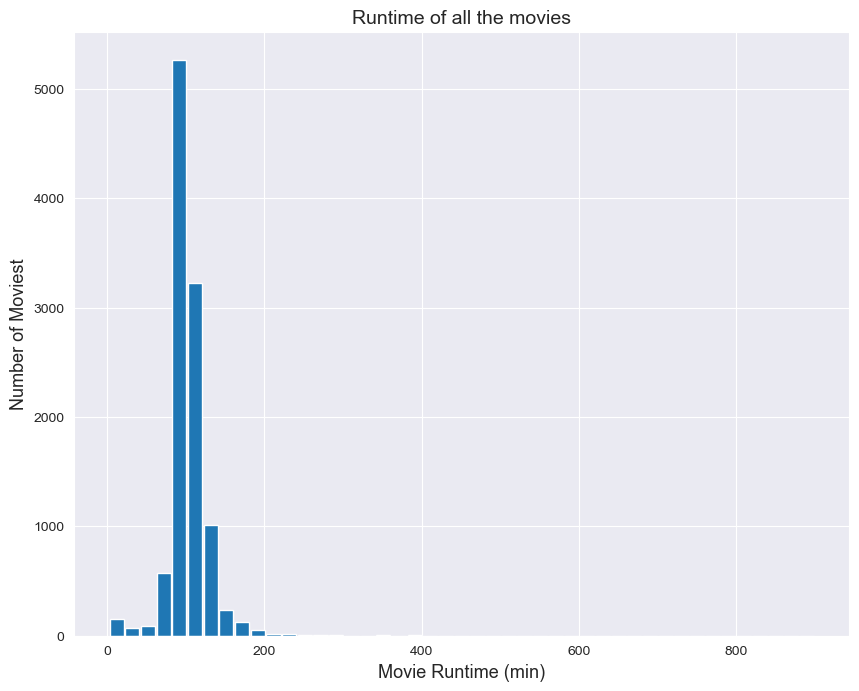

In [33]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(10,8), dpi = 100)

#On x-axis 
plt.xlabel('Movie Runtime (min)', fontsize = 13)
#On y-axis 
plt.ylabel('Number of Moviest', fontsize=13)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=14)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =45)
#displays the plot
plt.show()

The mean runtime for a movie in the dataset is 102 minutes.
There is a move that runs 900 minutes, that is too long.
20% of movies have a runtime of 90 minutes. 50% of the movies have a runtime of 99 minutes, 75% have runtime over 111 minutes

In [67]:
df = df.loc[:,['id', 'genres']]
df.head()

,id,genres
0,135397,[Action|Adventure|ScienceFiction|Thriller]
1,76341,[Action|Adventure|ScienceFiction|Thriller]
2,262500,[Adventure|ScienceFiction|Thriller]
3,140607,[Action|Adventure|ScienceFiction|Fantasy]
4,168259,[Action|Crime|Thriller]


In [72]:

# split the genres cells by the pipe and add to a list
genre_list = df['genres'].str.split('|').tolist()
genre_list[:5]

[nan, nan, nan, nan, nan]

In [64]:
for i in range(len(genre_list)):
    íf not isinstance(genre_list[i],list):
        genre_list[i]=[gene_list[i]]

SyntaxError: invalid syntax (<ipython-input-64-38de0753ef25>, line 2)

In [63]:
stacked_genre = pd.DataFrame(genre_list, index=genre['id']).stack()

NameError: name 'genre' is not defined

### How does the movie budget and revenue compare over the years?<a class="anchor" id="research question 4"></a>

From the scatter plot we can see that the revenue is 3 to 4 times more than the budget over the same period

# **Conclusions**<a class="anchor" id="conclusion"></a>
Tip: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

 Tip: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

# **Citations**<a class="anchor" id="citations"></a>

https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj

https://github.com/emilylauyw/Udacity_DAND_Project3-Investigate_TMDb_Movie_Dataset/blob/master/investigate-tmdb-dataset.ipynb

https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/

https://www.matthewunrue.com/Projects/Udacity/TMDb/Project.html

https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset

https://github.com/bharatk101/tmdb/blob/master/tmdb.ipynb

https://carlyhochreiter.files.wordpress.com/2018/05/investigating-movie-dataset.pdf

https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe

https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])